In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/merged_df_cousera4.csv')

df1.head()

,title,cantidad_ventas,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,price,language,Level,sales
0,Introduction to Web Development,3677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
1,Machine Learning,947,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1.0,314.0,中文,Advanced,297358.0
2,Machine Learning,801,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1.0,278.0,English,Introductory,222678.0
3,Machine Learning,344,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1.0,214.0,Deutsch,Advanced,73616.0
4,Machine Learning,406,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1.0,144.0,中文,Introductory,58464.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519322 entries, 0 to 519321
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            519322 non-null  object 
 1   cantidad_ventas  519322 non-null  int64  
 2   institution      519321 non-null  object 
 3   course_url       519321 non-null  object 
 4   course_id        519321 non-null  object 
 5   reviews          519265 non-null  object 
 6   reviewers        519321 non-null  object 
 7   date_reviews     519321 non-null  object 
 8   rating           519321 non-null  float64
 9   price            519322 non-null  float64
 10  language         519321 non-null  object 
 11  Level            519321 non-null  object 
 12  sales            519322 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 51.5+ MB


In [5]:
df1.describe()

,cantidad_ventas,rating,price,sales
count,519322.000000,519321.000000,519322.000000,519322.000000
mean,549.241062,4.689287,201.482649,110666.885135
std,260.120010,0.710886,113.776565,86728.668959
min,100.000000,1.000000,0.000000,0.000000
25%,324.000000,5.000000,103.000000,40135.000000
50%,550.000000,5.000000,201.000000,87984.000000
75%,774.000000,5.000000,300.000000,164190.000000
max,3677.000000,5.000000,398.000000,397204.000000


In [6]:
df1.columns

Index(['title', 'cantidad_ventas', 'institution', 'course_url', 'course_id',
       'reviews', 'reviewers', 'date_reviews', 'rating', 'price', 'language',
       'Level', 'sales'],
      dtype='object')

# La matriz de correlación para el DataFrame df1 muestra los coeficientes de correlación entre las columnas cantidad_ventas, rating, price y sales. Aquí hay una interpretación de los resultados:

La columna cantidad_ventas tiene una correlación positiva moderada con la columna sales (coeficiente de correlación de 0.604). Esto sugiere que a medida que aumenta la cantidad de ventas, también tiende a aumentar el valor de las ventas.
La columna rating muestra una correlación débil con sales y price, con coeficientes cercanos a cero. Esto indica que no hay una relación lineal fuerte entre las calificaciones y las ventas o los precios.
 La columna price tiene una correlación positiva moderada con sales (coeficiente de correlación de 0.720). Esto sugiere que a medida que aumenta el precio, también tiende a aumentar el valor de las ventas.

In [7]:
correlation_matrix = df1.corr()
print(correlation_matrix)


                 cantidad_ventas    rating     price     sales
cantidad_ventas         1.000000 -0.001511  0.000147  0.604283
rating                 -0.001511  1.000000  0.002784  0.000636
price                   0.000147  0.002784  1.000000  0.720068
sales                   0.604283  0.000636  0.720068  1.000000


<ipython-input-7-bbd0bf46a46c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


<ipython-input-8-0d7f81af143a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


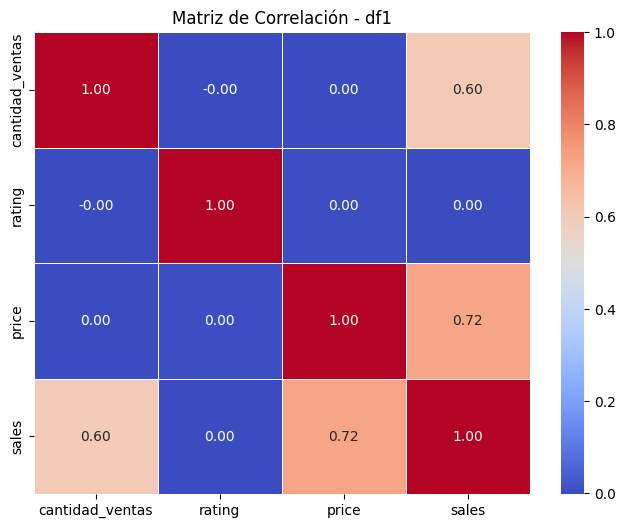

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df1.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación - df1')
plt.show()


#Segmentación por precio:

Puedes utilizar la función groupby para agrupar los cursos por rango de precios y luego calcular la suma de las ventas en cada grupo.
 También puedes crear histogramas o gráficos de barras para visualizar la distribución de las ventas según los diferentes rangos de precios.

In [9]:
'''# Segmentación por precio
df1['price_group'] = pd.cut(df1['price'], bins=[0, 10, 50, np.inf], labels=['Bajo precio', 'Precio moderado', 'Alto precio'])

# Segmentación por idioma
language_sales = df1.groupby('language')['sales'].sum().reset_index()

# Segmentación por nivel
level_sales = df1.groupby('Level')['sales'].sum().reset_index()

# Segmentación por rating
rating_sales = df1.groupby('rating')['sales'].sum().reset_index()


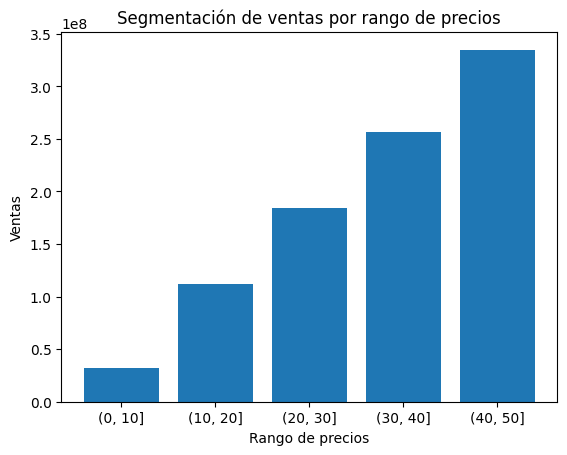

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los rangos de precios
price_ranges = [0, 10, 20, 30, 40, 50]

# Crear una nueva columna para el rango de precios
df1['price_range'] = pd.cut(df1['price'], bins=price_ranges)

# Agrupar los cursos por rango de precios y calcular la suma de las ventas en cada grupo
price_sales = df1.groupby('price_range')['sales'].sum()

# Visualizar los resultados
plt.bar(price_sales.index.astype(str), price_sales)
plt.xlabel('Rango de precios')
plt.ylabel('Ventas')
plt.title('Segmentación de ventas por rango de precios')
plt.show()


In [17]:
import pandas as pd

# Analizar la distribución de los precios
price_stats = df1['price'].describe()

# Definir los rangos de precios automáticamente utilizando pd.cut()
price_ranges = pd.cut(df1['price'], bins=7)



# Asignar los rangos de precios al DataFrame df1
df1['price_range'] = price_ranges

# Imprimir el DataFrame con la columna de rangos de precios
print(df1[['price', 'price_range']].head())


   price         price_range
0    0.0    (-0.398, 56.857]
1  314.0  (284.286, 341.143]
2  278.0  (227.429, 284.286]
3  214.0  (170.571, 227.429]
4  144.0  (113.714, 170.571]


In [18]:
import pandas as pd
import numpy as np

# Analizar la distribución de los precios
price_stats = df1['price'].describe()

# Definir los rangos de precios automáticamente utilizando pd.cut()
price_ranges = pd.cut(df1['price'], bins=7)

# Asignar los rangos de precios al DataFrame df1
df1['price_range'] = price_ranges

# Imprimir el DataFrame con la columna de rangos de precios
print(df1[['price', 'price_range']].head())


   price         price_range
0    0.0    (-0.398, 56.857]
1  314.0  (284.286, 341.143]
2  278.0  (227.429, 284.286]
3  214.0  (170.571, 227.429]
4  144.0  (113.714, 170.571]


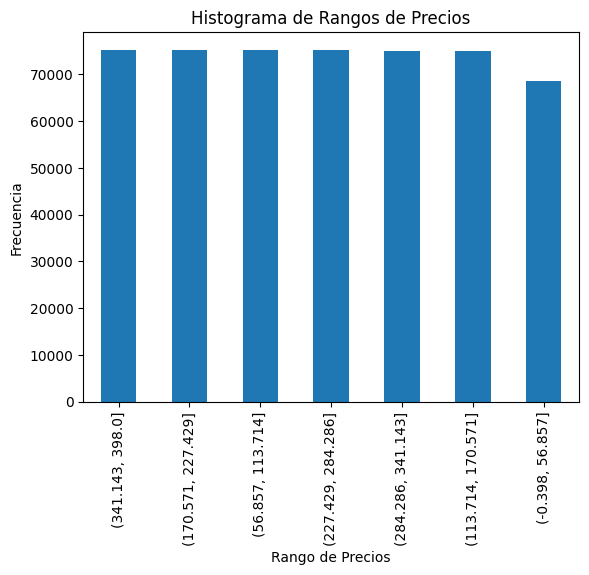

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Analizar la distribución de los precios
price_stats = df1['price'].describe()

# Definir los rangos de precios automáticamente utilizando pd.cut()
price_ranges = pd.cut(df1['price'], bins=7)

# Asignar los rangos de precios al DataFrame df1
df1['price_range'] = price_ranges

# Obtener la cuenta de valores en cada rango de precios
price_counts = df1['price_range'].value_counts()

# Graficar el histograma de los rangos de precios
price_counts.plot.bar()

# Configurar el título y los ejes del gráfico
plt.title('Histograma de Rangos de Precios')
plt.xlabel('Rango de Precios')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


# Segmentación por nivel:

Utiliza la función groupby para agrupar los cursos por nivel y luego calcula la suma de las ventas en cada grupo.
Crea gráficos de barras para visualizar las ventas según el nivel de los cursos.

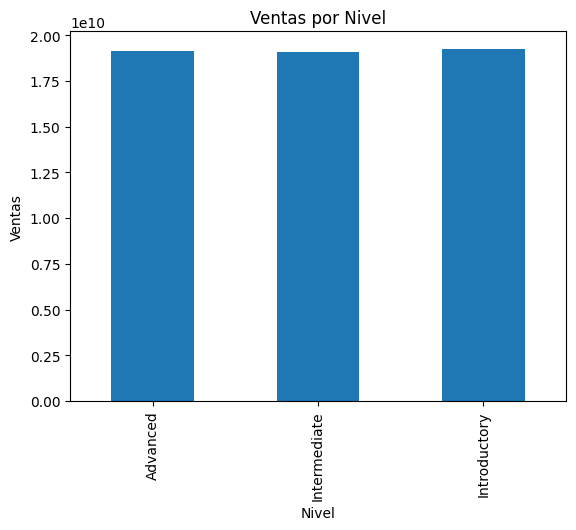

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Segmentación por nivel y cálculo de ventas
level_sales = df1.groupby('Level')['sales'].sum()

# Creación del gráfico de barras
level_sales.plot.bar()

# Configuración del título y los ejes del gráfico
plt.title('Ventas por Nivel')
plt.xlabel('Nivel')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()


# Se nos solicita un Word Cloud de las palabras clave que más se repiten dentro del título -se pueden añadir otras variables de nuestro interés-.

In [22]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [23]:
text = ' '.join(df1['title'])


# Crea el objeto WordCloud y genera el Word Cloud:

In [24]:
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text)


# Visualiza el Word Cloud:

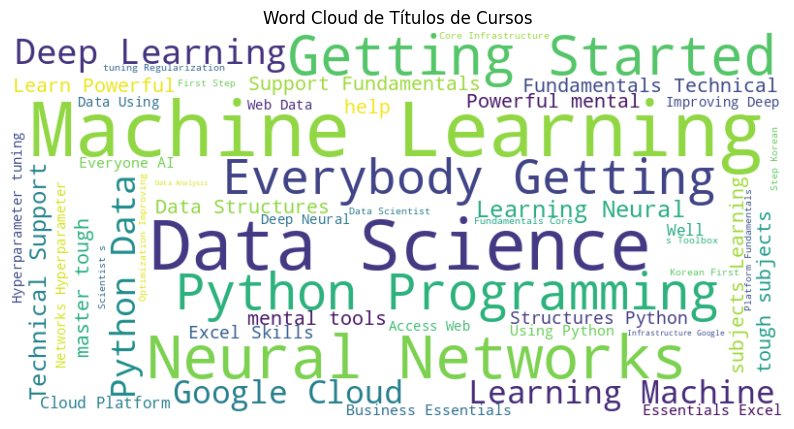

In [25]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Títulos de Cursos')
plt.show()


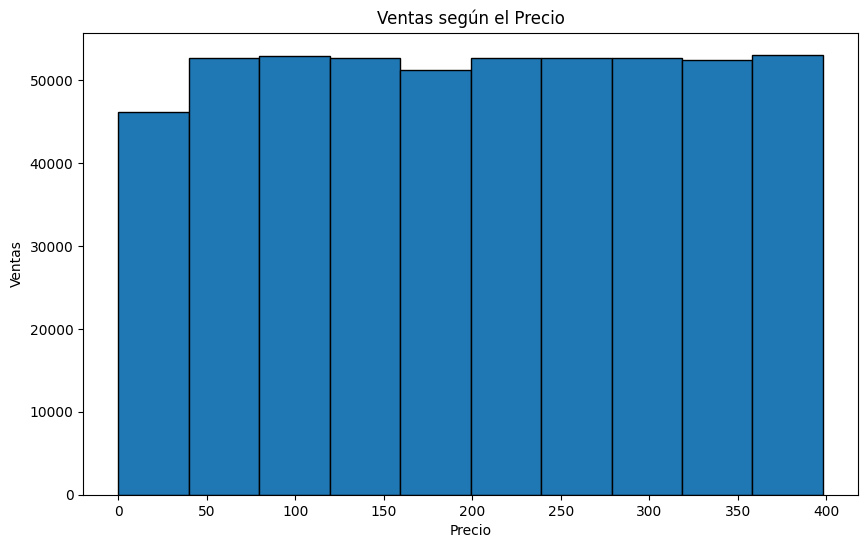

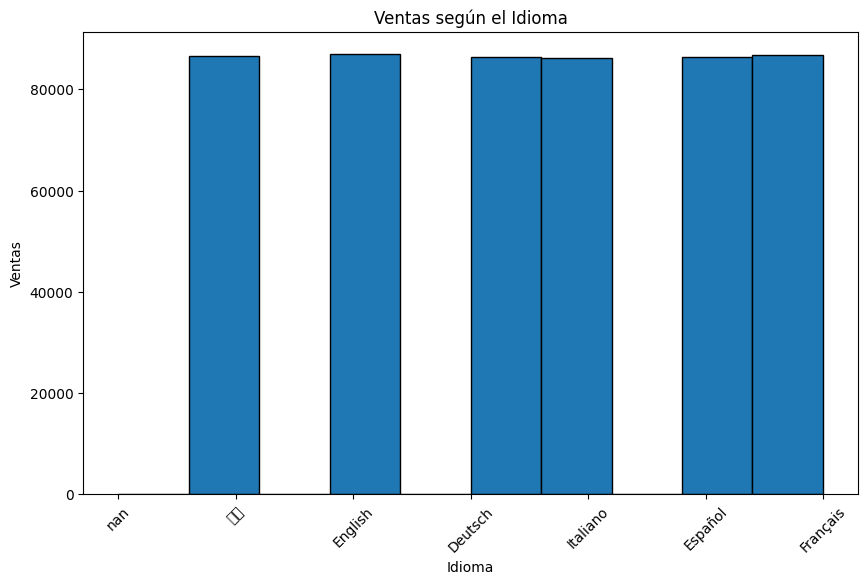

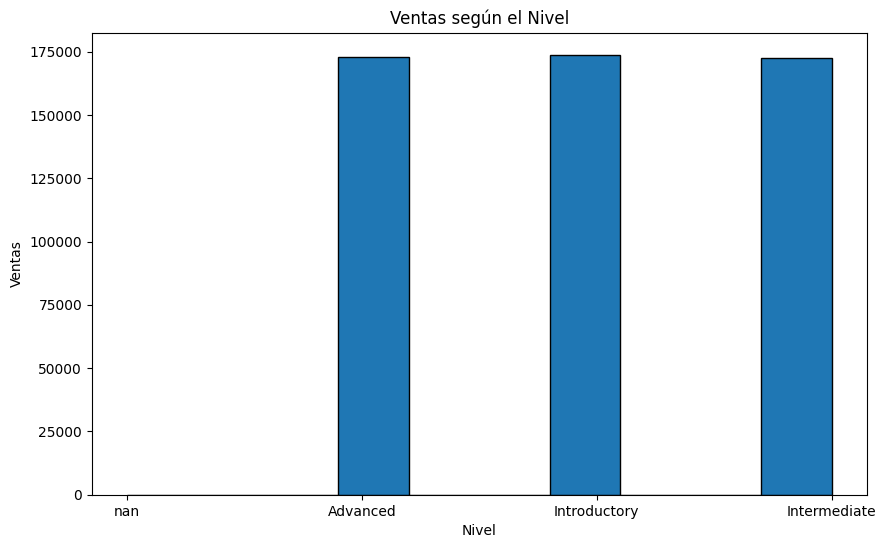

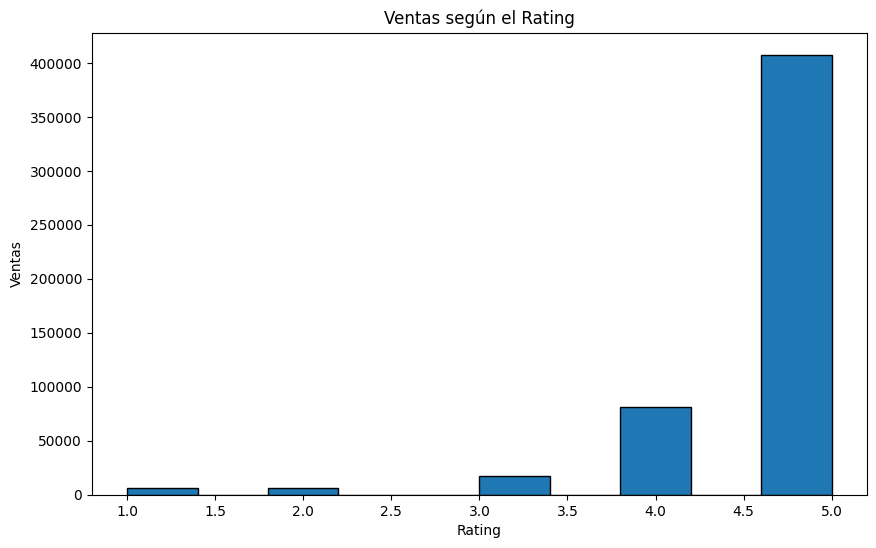

In [28]:
import matplotlib.pyplot as plt

# Histograma de ventas según el precio
plt.figure(figsize=(10, 6))
plt.hist(df1['price'], bins=10, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.title('Ventas según el Precio')
plt.show()

# Convertir las columnas 'language' y 'Level' a strings
df1['language'] = df1['language'].astype(str)
df1['Level'] = df1['Level'].astype(str)

# Histograma de ventas según el idioma
plt.figure(figsize=(10, 6))
plt.hist(df1['language'], edgecolor='black')
plt.xlabel('Idioma')
plt.ylabel('Ventas')
plt.title('Ventas según el Idioma')
plt.xticks(rotation=45)
plt.show()

# Histograma de ventas según el nivel
plt.figure(figsize=(10, 6))
plt.hist(df1['Level'], edgecolor='black')
plt.xlabel('Nivel')
plt.ylabel('Ventas')
plt.title('Ventas según el Nivel')
plt.show()

# Histograma de ventas según el rating
plt.figure(figsize=(10, 6))
plt.hist(df1['rating'], edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Ventas')
plt.title('Ventas según el Rating')
plt.show()

